## Experiments conducted:
- Adding layers and its effets on decision boundary.
    - result: a better decision boundary should have been possible
-  Diff data into models
    - result: model failed, and there was no loss in training, accuracy remained (45+-5)


In [1]:
## addding layers affects decision boundarines

In [ ]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [4]:
X=df.drop(columns=['placed'])

In [5]:
y=df['placed']

In [6]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=2))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\user\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 403ms/step - accuracy: 0.4963 - loss: 0.9390 - val_accuracy: 0.6250 - val_loss: 0.7482
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.4829 - loss: 0.9492 - val_accuracy: 0.6250 - val_loss: 0.7430
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.4963 - loss: 0.9208 - val_accuracy: 0.6250 - val_loss: 0.7380
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.4829 - loss: 0.9311 - val_accuracy: 0.6250 - val_loss: 0.7331
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4629 - loss: 0.9502 - val_accuracy: 0.6250 - val_loss: 0.7285
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.4896 - loss: 0.9058 - val_accuracy: 0.6250 - val_loss: 0.7241
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.4829 - loss: 0.9057 - val_accuracy: 0.6250 - val_loss: 0.7198
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.4896 - loss: 0.8892 - val_accuracy: 0.6250 - va

In [12]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


In [13]:
y_pred

array([[0.48556596],
       [0.49461654],
       [0.48654282],
       [0.49151286],
       [0.46692008],
       [0.52325845],
       [0.49925536],
       [0.47642612],
       [0.46964663],
       [0.4879486 ],
       [0.4712629 ],
       [0.47486663],
       [0.48906955],
       [0.5435865 ],
       [0.4933719 ],
       [0.4947286 ],
       [0.49410015],
       [0.5234619 ],
       [0.50443643],
       [0.48298466]], dtype=float32)

In [14]:
y_pred=y_pred.argmax(axis=-1)

In [15]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.55

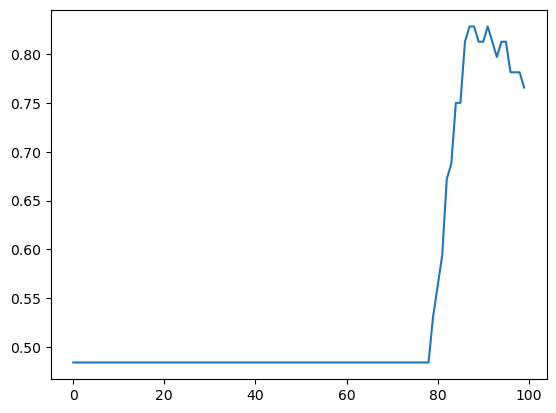

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

In [18]:
X

,cgpa,resume_score
0,8.14,6.52
1,6.17,5.17
2,8.27,8.86
3,6.88,7.27
4,7.52,7.30
...,...,...
95,6.33,6.38
96,8.23,7.76
97,6.65,7.78
98,8.14,5.63


In [19]:
A=X.to_numpy()

In [20]:
b=y.to_numpy()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


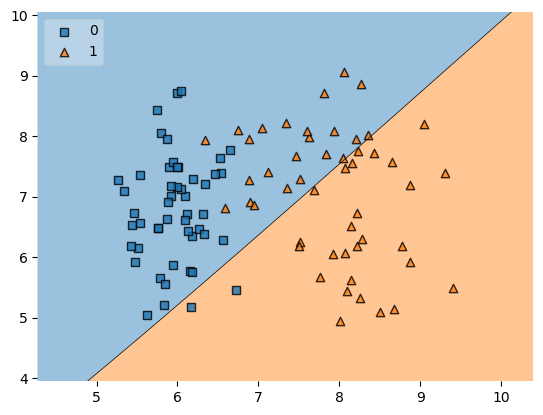

In [21]:
plot_decision_regions(A, b.astype('int'), clf=model, legend=2)

plt.show()

In [22]:
model1 = Sequential()

model1.add(Dense(11,activation='sigmoid',input_dim=2))
model1.add(Dense(11,activation='sigmoid'))
model1.add(Dense(11,activation='sigmoid'))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model1.fit(X_train,y_train,batch_size=50,epochs=200,verbose=1,validation_split=0.2)

Epoch 1/200


C:\Users\user\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 507ms/step - accuracy: 0.3767 - loss: 0.6957 - val_accuracy: 0.6250 - val_loss: 0.6929
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.3663 - loss: 0.6947 - val_accuracy: 0.6250 - val_loss: 0.6921
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.4042 - loss: 0.6946 - val_accuracy: 0.6250 - val_loss: 0.6925
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.3462 - loss: 0.6944 - val_accuracy: 0.5625 - val_loss: 0.6929
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.3663 - loss: 0.6940 - val_accuracy: 0.4375 - val_loss: 0.6934
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.4725 - loss: 0.6939 - val_accuracy: 0.3750 - val_loss: 0.6942
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5238 - loss: 0.6935 - val_accuracy: 0.3750 - val_loss: 0.6947
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.5037 - loss: 0.6935 - val_accuracy: 0.3750 - val_loss: 0.6

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


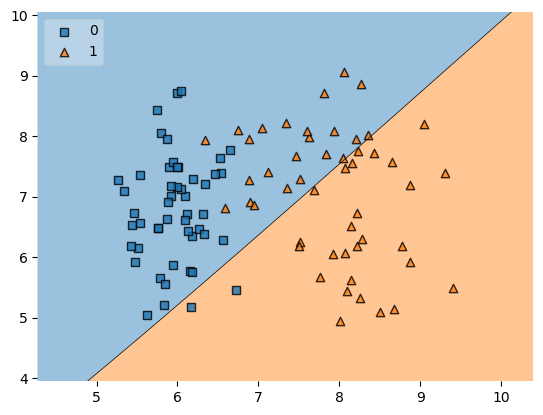

In [23]:
plot_decision_regions(A, b.astype('int'), clf=model, legend=2)

plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


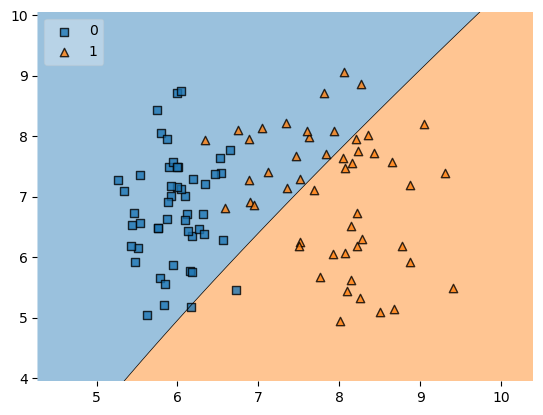

In [24]:
plot_decision_regions(A, b.astype('int'), clf=model1, legend=2)

plt.show()

### Observation
- data should have a clear decision boundary, but it failedddd...

In [25]:
## diff data into models


In [26]:
d2=pd.read_csv('babies.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'babies.csv'

In [ ]:

d2
d2=d2.drop(columns=['case'])

In [ ]:



d2=d2.drop(columns= ['gestation'])

In [ ]:
d2

In [ ]:
X=d2.drop(columns=['smoke'])
y=d2['smoke']

In [ ]:
X

In [ ]:
y

In [ ]:



from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
model3 = Sequential()

model3.add(Dense(10,activation='sigmoid',input_dim=5))
model3.add(Dense(10,activation='sigmoid'))
model3.add(Dense(10,activation='sigmoid'))
model3.add(Dense(10,activation='sigmoid'))
model3.add(Dense(1,activation='sigmoid'))
adam = Adam(learning_rate=0.04)
model3.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model3.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)


In [ ]:
A=X.to_numpy()
b=y.to_numpy()


## Results:
- model gave bad results...